In [29]:
import numpy as np
import matplotlib.pyplot as plt

from utility import *
from theoretical import *
from scipy.stats import sem

In [30]:
np.random.seed(4198)
S_0, K, r, T, sig = 50.0, 60.0, 0.05, 1.0, 0.2

In [31]:
def european_call_plain(n):
    # Simulate asset prices at maturity
    Z = np.random.normal(0, 1, n)
    S_T = S_0 * np.exp((r - 0.5 * sig**2) * T + sig * np.sqrt(T) * Z)
    
    payoffs = np.maximum(S_T - K, 0)
    discounted_payoffs = np.exp(-r * T) * payoffs

    est = np.mean(discounted_payoffs)
    se = sem(discounted_payoffs)
    re = se / np.abs(est)

    return est, se, re

In [32]:
ns = [10**i for i in range(2, 7)]
ests = []
ses = []
res = []
for n in ns:
    est, se, re = european_call_plain(n)
    ests.append(est)
    ses.append(se)
    res.append(re)

In [33]:
# Print Results
for n, est, se, re in zip(ns, ests, ses, res):
    print(f"Sample Size: {n}, Estimate: {est:.4f}, Standard Error: {se:.4f}, Relative Error: {re:.4f}")

Sample Size: 100, Estimate: 2.0756, Standard Error: 0.4202, Relative Error: 0.2024
Sample Size: 1000, Estimate: 1.5780, Standard Error: 0.1368, Relative Error: 0.0867
Sample Size: 10000, Estimate: 1.6041, Standard Error: 0.0428, Relative Error: 0.0267
Sample Size: 100000, Estimate: 1.6370, Standard Error: 0.0137, Relative Error: 0.0084
Sample Size: 1000000, Estimate: 1.6248, Standard Error: 0.0043, Relative Error: 0.0027


In [34]:
theoretical = european_call(S_0, K, r, T, sig)
print(f"Theoretical Price: {theoretical:.4f}")

Theoretical Price: 1.6237


In [37]:
def asian_call_plain(m, n):
    dt = T / m
    discount_factor = np.exp(-r * T)
    
    payoffs = []
    Z = np.random.normal(0, 1, (n, m))
    W_t = np.cumsum(Z, axis=1)
    S_t = S_0 * np.exp((r - 0.5 * sig**2) * (np.arange(1, m + 1) * dt) + sig * np.sqrt(dt) * W_t)
    S_avg = np.mean(S_t, axis=1)

    payoffs = np.maximum(S_avg - K, 0)
    discounted_payoffs = discount_factor * payoffs

    est = np.mean(discounted_payoffs)
    se = sem(discounted_payoffs)
    re = se / np.abs(est)

    return est, se, re

In [38]:
ns_asian = [10**i for i in range(2, 7)]
ests_asian = []
ses_asian = []
res_asian = []
m = 100  # Number of time steps
for n in ns_asian:
    est, se, re = asian_call_plain(m, n)
    ests_asian.append(est)
    ses_asian.append(se)
    res_asian.append(re)

In [ ]:
# Print Results for Asian Call Option
for n, est, se, re in zip(ns_asian, ests_asian, ses_asian, res_asian):
    print(f"Sample Size: {n}, Estimate: {est:.4f}, Standard Error: {se:.4f}, Relative Error: {re:.4f}")

Sample Size: 100, Estimate: 0.2823, Standard Error: 0.1224, Relative Error: 0.4336
Sample Size: 1000, Estimate: 0.2534, Standard Error: 0.0357, Relative Error: 0.1409
Sample Size: 10000, Estimate: 0.2650, Standard Error: 0.0122, Relative Error: 0.0460
Sample Size: 100000, Estimate: 0.2715, Standard Error: 0.0040, Relative Error: 0.0147
Sample Size: 1000000, Estimate: 0.2700, Standard Error: 0.0013, Relative Error: 0.0047


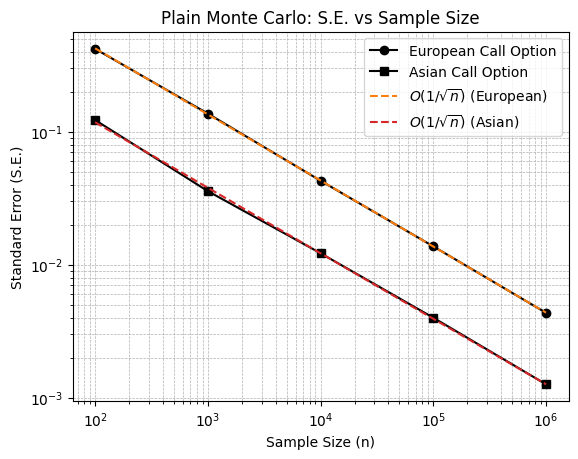

In [ ]:
# Plot Standard Error vs Sample Size
plt.loglog(ns, ses, color='black', marker='o', label='European Call Option')
plt.loglog(ns, ses_asian, color='black', marker='s', label='Asian Call Option')

# Plot reference lines for O(1/sqrt(n))
n_ref = np.array(ns)

m, b = np.polyfit(np.log10(n_ref), np.log10(ses), 1)
se_ref = 10**b * n_ref**m
plt.loglog(n_ref, se_ref, color='tab:orange', linestyle='--', label=r'$O(1/\sqrt{n})$ (European)')

n_ref_asian = np.array(ns_asian)

m_asian, b_asian = np.polyfit(np.log10(n_ref_asian), np.log10(ses_asian), 1)
se_ref_asian = 10**b_asian * n_ref_asian**m_asian
plt.loglog(n_ref_asian, se_ref_asian, color='tab:red', linestyle='--', label=r'$O(1/\sqrt{n})$ (Asian)')

plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error (S.E.)')
plt.title('Plain Monte Carlo: S.E. vs Sample Size')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.savefig('../report/assets/plain-monte-carlo-se-vs-sample-size.png')